In [ ]:
pip install lifelines

In [2]:
# Importe das Bibliotecas que serão usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test

In [3]:
df = pd.read_csv("dadosGrupo2.txt", sep = "\t",header = None,names=["unidade", "idade", "sexo","status","tempo","grande","causa"],skiprows=1)

In [4]:
df.head()

,unidade,idade,sexo,status,tempo,grande,causa
0,128,52,1,0,19,1,out
1,128,76,0,0,1,1,out
2,128,61,1,0,2,1,out
3,128,35,0,0,6,1,out
4,128,42,0,0,11,1,out


In [5]:
df.isnull().sum()

unidade    0
idade      0
sexo       0
status     0
tempo      0
grande     0
causa      0
dtype: int64

(array([660.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 201.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

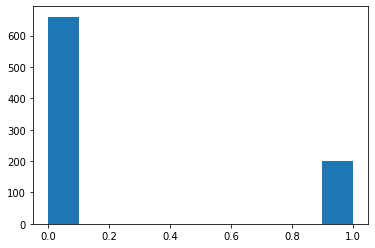

In [6]:
plt.hist(x =df['status'])

(array([  1.,   9.,  38., 101., 149., 179., 193., 131.,  54.,   6.]),
 array([ 0. ,  9.3, 18.6, 27.9, 37.2, 46.5, 55.8, 65.1, 74.4, 83.7, 93. ]),
 <a list of 10 Patch objects>)

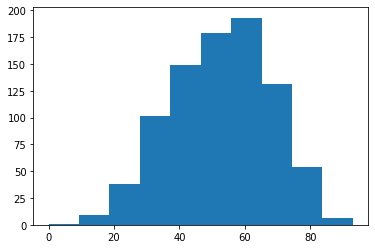

In [7]:
plt.hist(x =df['idade'])

In [8]:
df.describe()

,unidade,idade,sexo,status,tempo,grande
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,1165.516841,52.862950,0.508711,0.233449,14.317073,0.761905
std,811.660888,15.321661,0.500215,0.423272,12.096532,0.426165
min,128.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,641.000000,42.000000,0.000000,0.000000,4.000000,1.000000
50%,1070.000000,53.000000,1.000000,0.000000,11.000000,1.000000
75%,1159.000000,65.000000,1.000000,0.000000,23.000000,1.000000
max,5692.000000,93.000000,1.000000,1.000000,44.000000,1.000000


In [9]:
kmf = KaplanMeierFitter()

In [10]:
kmf

<lifelines.KaplanMeierFitter>

In [11]:
# Criação de uma coluna morte para organizar os dados, é necessário saber quem está vivo e quem não está
# Na coluna status 0 represena censurado e 1 representa morto. Portanto, todos que são 1 estão mortos e o 0 seria vivo.
# Para a coluna morto, 0 representa morto

df.loc[df['status'] ==1, 'morto'] = 0
df.loc[df['status'] == 0, 'morto'] = 1

In [12]:
df.head()

,unidade,idade,sexo,status,tempo,grande,causa,morto
0,128,52,1,0,19,1,out,1.0
1,128,76,0,0,1,1,out,1.0
2,128,61,1,0,2,1,out,1.0
3,128,35,0,0,6,1,out,1.0
4,128,42,0,0,11,1,out,1.0


In [13]:
#objetivo é descobrir o número de dias que um paciente sobreviveu antes de morrer. Nosso evento de interesse será “morte”, que
# é armazenado na coluna “morto”. O primeiro argumento que leva é a linha do tempo para nosso experimento.
kmf.fit(durations = df['tempo'], event_observed = df['morto'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 861 total observations, 201 right-censored observations>

In [14]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,861,861
1.0,62,40,22,0,861
2.0,89,57,32,0,799
3.0,62,48,14,0,710
4.0,37,19,18,0,648
5.0,28,19,9,0,611
6.0,30,22,8,0,583
7.0,27,17,10,0,553
8.0,32,24,8,0,526


In [15]:
# Probabilidade  de sobrevivência em t=0

event_at_0  = kmf.event_table.iloc[0,:]

# Calculando a probabilidade de sobrevivência para t =0

surv_for_0= (event_at_0.at_risk - event_at_0.observed)/event_at_0.at_risk


In [16]:
surv_for_0

1.0

In [17]:
# Probabilidade  de sobrevivência em t=0

event_at_10  = kmf.event_table.iloc[1,:]

# Calculando a probabilidade de sobrevivência para t =0

surv_for_10= (event_at_10.at_risk - event_at_10.observed)/event_at_10.at_risk


In [18]:
surv_for_10

0.9535423925667829

In [19]:
 # Obter a probabilidade de sobrevivência para toda a linha do tempo:

 print(kmf.survival_function_)

          KM_estimate
timeline             
0.0          1.000000
1.0          0.953542
2.0          0.885517
3.0          0.825651
4.0          0.801443
5.0          0.776520
6.0          0.747218
7.0          0.724247
8.0          0.691202
9.0          0.675811
10.0         0.634724
11.0         0.615970
12.0         0.576653
13.0         0.542293
14.0         0.524065
15.0         0.502358
16.0         0.492997
17.0         0.464555
18.0         0.438924
19.0         0.412914
20.0         0.389883
21.0         0.378220
22.0         0.363224
23.0         0.338000
24.0         0.316140
25.0         0.302542
26.0         0.281914
27.0         0.264724
28.0         0.242378
29.0         0.224814
30.0         0.205342
31.0         0.198137
32.0         0.178323
33.0         0.167516
34.0         0.161932
35.0         0.143319
36.0         0.130290
37.0         0.116878
38.0         0.085710
39.0         0.074023
40.0         0.060387
41.0         0.038959
42.0         0.022555
43.0      

Text(0, 0.5, 'Probabilidade de Sobrevivência')

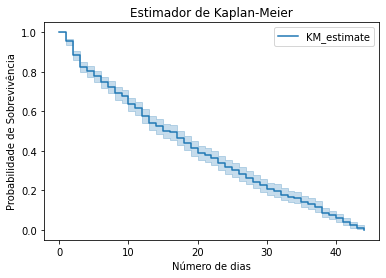

In [20]:
kmf.plot() 
plt.title("Estimador de Kaplan-Meier") 
plt.xlabel("Número de dias") 
plt.ylabel("Probabilidade de Sobrevivência")

In [21]:
# O número médio de dias de sobrevivência:

print("O tempo médio de sobrevivência é: ", kmf.median_survival_time_)

O tempo médio de sobrevivência é:  16.0


Estimador Kaplan Meier com dois grupos

In [22]:
# Divindindo os dados em dois grupos
masculino =  df[(df['sexo']==1)]
feminino =  df[(df['sexo']==0)]

In [23]:
# Criação de dois objetos Kaplan Meier

kmf_masculino = KaplanMeierFitter()
kmf_feminino = KaplanMeierFitter()

In [24]:
# Ajustando os dados

kmf_masculino.fit(durations = masculino['tempo'], event_observed = masculino['morto'], label = 'masculino')
kmf_feminino.fit(durations = feminino['tempo'], event_observed = feminino['morto'], label = 'feminino')

<lifelines.KaplanMeierFitter:"feminino", fitted with 423 total observations, 109 right-censored observations>

In [25]:
# Mesa de eventos

kmf_masculino.event_table
kmf_feminino.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,423,423
1.0,29,20,9,0,423
2.0,46,28,18,0,394
3.0,25,18,7,0,348
4.0,18,7,11,0,323
5.0,12,9,3,0,305
6.0,13,8,5,0,293
7.0,14,7,7,0,280
8.0,18,11,7,0,266


In [26]:
# Prever a Probabilidade de Sobrevivencia para o mês de outubro para o sexo masculino

kmf_masculino.predict(10)

0.5996673046418524

In [27]:
# Prever a Probabilidade de Sobrevivencia para o mês de outubro para o sexo feminino
kmf_feminino.predict(10)

0.6715424435478354

In [ ]:
# Probabilidade de sobrevivêcia para o grupo masculino

kmf_masculino.survival_function_

In [ ]:
# Probabilidade de sobrevivêcia para o grupo feminino

kmf_feminino.survival_function_

Text(0.5, 1.0, 'KMF para ambos os sexos')

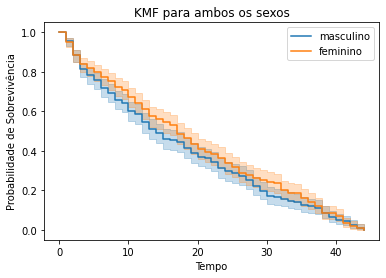

In [30]:
# Gráfico para a probabilidade de sobrevivência para ambos os sexos

# Probabilidade de sobrevivêcia para o grupo masculino

kmf_masculino.plot()
kmf_feminino.plot()
plt.xlabel("Tempo") 
plt.ylabel("Probabilidade de Sobrevivência") 
plt.title("KMF para ambos os sexos")

O teste de log-rank é um teste de hipótese usado para comparar a distribuição de sobrevivência de duas amostras.

Objetivo: Nosso objetivo é ver se há alguma diferença significativa entre o sexo masculino e o sexo feminino.

 
Hipótese nula : A hipótese nula afirma que não há diferença significativa entre os grupos em estudo

In [32]:
# Variaveis para o teste de Log-Rank
tempo_masculino = masculino['tempo']
evento_masculino = masculino['morto']

tempo_feminino = feminino['tempo']
evento_feminino = feminino['morto']


In [35]:
# Execução do Teste de Log-Rank

resultado = logrank_test(tempo_feminino, tempo_masculino, event_observerd_feminino =  evento_feminino, event_observerd_masculino = evento_masculino)

resultado.print_summary()


<lifelines.StatisticalResult: logrank_test>
                      t_0 = -1
        null_distribution = chi squared
       degrees_of_freedom = 1
 event_observerd_feminino = 1      1.0
3      1.0
4      1.0
8      1.0
10     0.0
      ... 
854    1.0
855    1.0
857    1.0
859    1.0
860    1.0
Name: morto, Length: 423, dtype: float64
event_observerd_masculino = 0      1.0
2      1.0
5      1.0
6      0.0
7      1.0
      ... 
848    1.0
850    0.0
851    1.0
856    1.0
858    1.0
Name: morto, Length: 438, dtype: float64
                test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.46 0.50      1.01

Um valor de p entre 0 e 1 denota a significância estatística. Quanto menor o valor de p, mais significativa é a diferença estatística entre os grupos em estudo.

Menor que (5% = 0,05) o valor P significa que há uma diferença significativa entre os grupos que comparamos. Podemos dividir nossos grupos com base em sexo, idade, raça, método de tratamento e outros.

Como o p-valor é alto, isso faz com que aceitamos a hipótese nula, isso significa que o sexo apresenta função de sobrevivência para ambos os grupos similares, ou seja,podemos dizer que o “sexo” de uma pessoa faz não apresenta uma diferença significativa na probabilidade de sobrevivência.



In [36]:
#Printar o p_value

print("O valor do p-value é:", resultado.p_value)

O valor do p-value é: 0.4960630927384202
